In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns


In [2]:
#Loaded Dataset
df = pd.read_csv('BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
x = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']]
y = df['medv']

<AxesSubplot:>

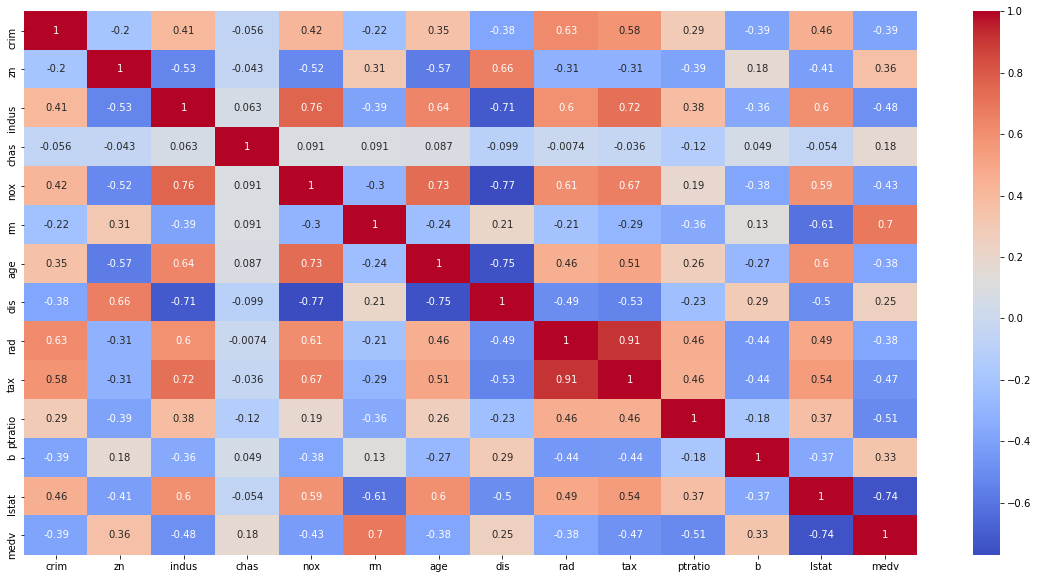

In [4]:
corr=df.corr()
plt.figure(figsize=(20,10))
# We will use the heatmap function from the seaborn library to plot the correlation matrix.
sns.heatmap(corr, annot=True, cmap='coolwarm')

<AxesSubplot:xlabel='lstat', ylabel='medv'>

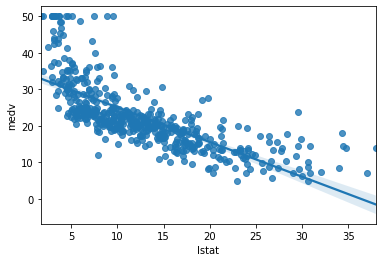

In [5]:
# LSTAT has a high negative correlation with MEDV(-0.74)
sns.regplot(y=df['medv'], x=df['lstat'])

In [6]:
# RM has a strong positive correlation with MEDV (0.7)
x = df['rm'].values.reshape(-1,1)
x

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [7]:
y = df['medv'].values.reshape(-1,1)
y

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

<AxesSubplot:xlabel='rm', ylabel='medv'>

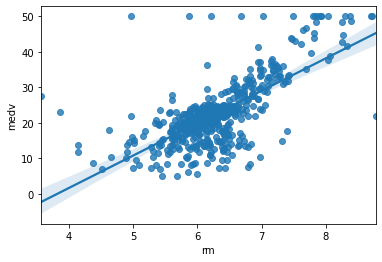

In [8]:
sns.regplot(y=df['medv'], x=df['rm'])

In [9]:
reg=linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression()

In [10]:
b=reg.coef_
b

array([[9.10210898]])

In [11]:
a=reg.intercept_
a

array([-34.67062078])

In [12]:
w=np.array([8,10,12,5,11]).reshape(-1,1)
reg.predict(w)

array([[38.14625107],
       [56.35046904],
       [74.554687  ],
       [10.83992413],
       [65.45257802]])

In [13]:
# y = bx + a
9.10210898*8+-34.670620776438554

38.14625106356145

In [14]:
d=pd.read_csv("rooms.csv")
d.head()

,rm
0,10
1,20
2,30
3,35
4,25


In [15]:
p=reg.predict(d)

In [16]:
# Create new column in dataframe and assign predict values(p)
d['medv']=p
d

,rm,medv
0,10,56.350469
1,20,147.371559
2,30,238.392649
3,35,283.903194
4,25,192.882104


In [17]:
# Use to_csv method to export the value of prediction
d.to_csv("rooms.csv")